### import

In [ ]:
!pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 49.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184505 sha256=48fabbafbd5c0be6d161a7c44e659a85f9e14aaf1a614590722265ca82d8eff1
  Stored in directory: /root/.cache/pip/wheels/32/b8/b2/c4c2b95765e615fe139b0b17b5ea7c0e1b6519b0a9ec8fb34d
Successfully built python-docx


In [ ]:
import pandas as pd
import docx
from docx.shared import Pt
from docx.enum.text import WD_COLOR_INDEX

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import re
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding , Dot, Permute, Concatenate

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa
from tensorflow_addons.metrics import F1Score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00


## loading data

In [ ]:
# input excel file path
inputExcelFile ="/content/drive/MyDrive/ter-dictionaries/databases.xlsx"

# Reading an excel file
df_med= pd.read_excel(inputExcelFile, engine = "openpyxl", sheet_name="Liste des spécialités", header=None)
#df2_med= pd.read_excel(inputExcelFile, engine = "openpyxl", sheet_name="Liste des génériques", header=None)

In [ ]:
df_med.columns =['List of specialties']
#df2_med.columns =['List of generics']
df_med = df_med.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
#df2_med = df2_med.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

In [ ]:
#df_med = pd.concat([df1_med,df2_med],axis=1)
#df_med.fillna('', inplace=True)
display(df_med)

,List of specialties
0,"a 313 200 000 ui pour cent, pommade"
1,"a 313 50 000 u.i., capsule molle"
2,"abacavir arrow 300 mg, comprimé pelliculé sécable"
3,"abacavir mylan 300 mg, comprimé pelliculé sécable"
4,"abacavir sandoz 300 mg, comprimé pelliculé séc..."
...,...
15694,"zytiga 250 mg, comprimé"
15695,"zytiga 500 mg, comprimé pelliculé"
15696,"zyvoxid 100 mg/5 ml, granulés pour suspension ..."
15697,"zyvoxid 2 mg/ml, solution pour perfusion"


In [ ]:
# input excel file path
inputExcelFile ="/content/drive/MyDrive/ter-dictionaries/20220706 - MedDRA 25.0.xlsx"

df1 = pd.read_excel(inputExcelFile, engine = "openpyxl", sheet_name="SOC", header=0)

In [ ]:
display(df1)

,soc_code,soc_name_fr,soc_name_en,soc_abbrev
0,10042613,Actes médicaux et chirurgicaux,Surgical and medical procedures,Surg
1,10007541,Affections cardiaques,Cardiac disorders,Card
2,10010331,"Affections congénitales, familiales et génétiques","Congenital, familial and genetic disorders",Cong
3,10013993,Affections de l'oreille et du labyrinthe,Ear and labyrinth disorders,Ear
4,10040785,Affections de la peau et du tissu sous-cutané,Skin and subcutaneous tissue disorders,Skin
5,10038604,Affections des organes de reproduction et du sein,Reproductive system and breast disorders,Repro
6,10038359,Affections du rein et des voies urinaires,Renal and urinary disorders,Renal
7,10021428,Affections du système immunitaire,Immune system disorders,Immun
8,10029205,Affections du système nerveux,Nervous system disorders,Nerv
9,10014698,Affections endocriniennes,Endocrine disorders,Endo


In [ ]:
df2 = pd.read_excel(inputExcelFile, engine = "openpyxl", sheet_name="PT", header=0)
#display(df2)

In [ ]:
df2.columns = ['pt_code','pt_name_fr','pt_name_en','soc_code']

In [ ]:
df_pt = pd.merge(df2, df1, left_on='soc_code', right_on='soc_code', how='outer')
#display(df_pt)

In [ ]:
df3 = pd.read_excel(inputExcelFile, engine = "openpyxl", sheet_name="LLT", header=0)
#display(df3)

In [ ]:
df_symptom = pd.merge(df3, df_pt, left_on='pt_code', right_on='pt_code', how='outer')
df_symptom = df_symptom.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
display(df_symptom)

,llt_code,llt_name_fr,llt_name_en,pt_code,llt_currency,pt_name_fr,pt_name_en,soc_code,soc_name_fr,soc_name_en,soc_abbrev
0,10058336,"""white clot syndrome""",white clot syndrome,10062506,y,thrombopénie induite par héparine,heparin-induced thrombocytopenia,10005329,affections hématologiques et du système lympha...,blood and lymphatic system disorders,blood
1,10048672,thrombocytopénie induite par l'héparine de typ...,heparin-induced thrombocytopenia type ii,10062506,y,thrombopénie induite par héparine,heparin-induced thrombocytopenia,10005329,affections hématologiques et du système lympha...,blood and lymphatic system disorders,blood
2,10085458,thrombopénie et thrombose induites par l'héparine,heparin-induced thrombocytopenia and thrombosis,10062506,y,thrombopénie induite par héparine,heparin-induced thrombocytopenia,10005329,affections hématologiques et du système lympha...,blood and lymphatic system disorders,blood
3,10062506,thrombopénie induite par héparine,heparin-induced thrombocytopenia,10062506,y,thrombopénie induite par héparine,heparin-induced thrombocytopenia,10005329,affections hématologiques et du système lympha...,blood and lymphatic system disorders,blood
4,10051601,thrombopénie induite par héparine sai,heparin-induced thrombocytopenia nos,10062506,y,thrombopénie induite par héparine,heparin-induced thrombocytopenia,10005329,affections hématologiques et du système lympha...,blood and lymphatic system disorders,blood
...,...,...,...,...,...,...,...,...,...,...,...
85086,10072218,zoster génital,genital zoster,10072210,y,zona génital,genital herpes zoster,10021881,infections et infestations,infections and infestations,infec
85087,10086594,zona oral,oral herpes zoster,10086594,y,zona oral,oral herpes zoster,10021881,infections et infestations,infections and infestations,infec
85088,10052672,zonulolyse,zonulolysis,10052672,y,zonulolyse,zonulolysis,10042613,actes médicaux et chirurgicaux,surgical and medical procedures,surg
85089,10048282,zoonose,zoonosis,10048282,y,zoonose,zoonosis,10021881,infections et infestations,infections and infestations,infec


In [214]:
symptom_dic =df_symptom.set_index('llt_name_fr').T.to_dict('list')

<ipython-input-214-9c668fdeb2bb>:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  symptom_dic =df_symptom.set_index('llt_name_fr').T.to_dict('list')


In [215]:
med_dic = df_med.to_dict(orient='list')
print(med_dic)

{'List of specialties': ['a 313 200 000 ui pour cent, pommade', 'a 313 50 000 u.i., capsule molle', 'abacavir arrow 300 mg, comprimé pelliculé sécable', 'abacavir mylan 300 mg, comprimé pelliculé sécable', 'abacavir sandoz 300 mg, comprimé pelliculé sécable', 'abacavir/lamivudine accord 600 mg/300 mg, comprimé pelliculé', 'abacavir/lamivudine arrow 600 mg/300 mg, comprimé pelliculé', 'abacavir/lamivudine biogaran 600 mg/300 mg, comprimé pelliculé', 'abacavir/lamivudine eg 600 mg/300 mg, comprimé pelliculé', 'abacavir/lamivudine mylan 600 mg/300 mg, comprimé pelliculé', 'abacavir/lamivudine mylan pharma 600 mg/300 mg, comprimé pelliculé', 'abacavir/lamivudine sandoz 600 mg/300 mg, comprimé pelliculé', 'abacavir/lamivudine teva 600 mg/300 mg, comprimé pelliculé', 'abacavir/lamivudine zentiva 600 mg/300 mg, comprimé pelliculé', 'abacavir/lamivudine/zidovudine mylan 300 mg/150 mg/300 mg, comprimé pelliculé', 'abasaglar 100 unités/ml, solution injectable en cartouche', 'abasaglar 100 unités

In [216]:
'''Split List of Specialits values by Medicine name and Medicine description'''
med_dict_new = {}
for med in med_dic['List of specialties']:
    # Separate string by space
    med_split = med.split()
    # The name of the medicine is the first element
    drug_name = med_split[0]
    
    # Value is a medicine description.
    drug_value = ' '.join(med_split[1:])
      # Save to dictionary
    med_dict_new[drug_name] = drug_value

print(med_dict_new)

{'a': '313 50 000 u.i., capsule molle', 'abacavir': 'sandoz 300 mg, comprimé pelliculé sécable', 'abacavir/lamivudine': 'zentiva 600 mg/300 mg, comprimé pelliculé', 'abacavir/lamivudine/zidovudine': 'mylan 300 mg/150 mg/300 mg, comprimé pelliculé', 'abasaglar': '100 unités/ml, solution injectable en stylo prérempli', 'abecma': '260 - 500 x 1 000 000 cellules, dispersion pour perfusion', 'abelcet': '5 mg/ml, suspension à diluer pour perfusion', 'abelmoschus': 'boiron, degré de dilution compris entre 4ch et 30ch ou entre 7dh et 60dh', 'abies': 'pectinata weleda, degré de dilution compris entre 2ch et 30ch ou entre 4dh et 60dh', 'abilify': 'maintena 400 mg, poudre et solvant pour suspension injectable à libération prolongée en seringue préremplie', 'abraxane': '5 mg/ml, poudre pour suspension injectable pour perfusion', 'abrotanum': 'weleda, degré de dilution compris entre 2ch et 30ch ou entre 4dh et 60dh', 'absinthium': 'lehning, degré de dilution compris entre 2ch et 30ch ou entre 4dh e

In [217]:
med_dict_new

{'a': '313 50 000 u.i., capsule molle',
 'abacavir': 'sandoz 300 mg, comprimé pelliculé sécable',
 'abacavir/lamivudine': 'zentiva 600 mg/300 mg, comprimé pelliculé',
 'abacavir/lamivudine/zidovudine': 'mylan 300 mg/150 mg/300 mg, comprimé pelliculé',
 'abasaglar': '100 unités/ml, solution injectable en stylo prérempli',
 'abecma': '260 - 500 x 1 000 000 cellules, dispersion pour perfusion',
 'abelcet': '5 mg/ml, suspension à diluer pour perfusion',
 'abelmoschus': 'boiron, degré de dilution compris entre 4ch et 30ch ou entre 7dh et 60dh',
 'abies': 'pectinata weleda, degré de dilution compris entre 2ch et 30ch ou entre 4dh et 60dh',
 'abilify': 'maintena 400 mg, poudre et solvant pour suspension injectable à libération prolongée en seringue préremplie',
 'abraxane': '5 mg/ml, poudre pour suspension injectable pour perfusion',
 'abrotanum': 'weleda, degré de dilution compris entre 2ch et 30ch ou entre 4dh et 60dh',
 'absinthium': 'lehning, degré de dilution compris entre 2ch et 30ch ou

In [218]:
# Convert the dictionary medicine to dataframe
df_new_med = pd.DataFrame.from_dict(med_dict_new, orient='index',columns=['Description'])
df_new_med.index.name = 'Medicine Name'
print(df_new_med)

                                                                      Description
Medicine Name                                                                    
a                                                  313 50 000 u.i., capsule molle
abacavir                                sandoz 300 mg, comprimé pelliculé sécable
abacavir/lamivudine                     zentiva 600 mg/300 mg, comprimé pelliculé
abacavir/lamivudine/zidovudine     mylan 300 mg/150 mg/300 mg, comprimé pelliculé
abasaglar                       100 unités/ml, solution injectable en stylo pr...
...                                                                           ...
zyprexa                                     velotab 5 mg, comprimé orodispersible
zyrtec                                      10 mg/ml, solution buvable en gouttes
zyrtecset                                       10 mg, comprimé pelliculé sécable
zytiga                                                 500 mg, comprimé pelliculé
zyvoxid         

In [219]:
df_new_med = df_new_med.reset_index(drop=False)

In [220]:
df_new_med

,Medicine Name,Description
0,a,"313 50 000 u.i., capsule molle"
1,abacavir,"sandoz 300 mg, comprimé pelliculé sécable"
2,abacavir/lamivudine,"zentiva 600 mg/300 mg, comprimé pelliculé"
3,abacavir/lamivudine/zidovudine,"mylan 300 mg/150 mg/300 mg, comprimé pelliculé"
4,abasaglar,"100 unités/ml, solution injectable en stylo pr..."
...,...,...
4667,zyprexa,"velotab 5 mg, comprimé orodispersible"
4668,zyrtec,"10 mg/ml, solution buvable en gouttes"
4669,zyrtecset,"10 mg, comprimé pelliculé sécable"
4670,zytiga,"500 mg, comprimé pelliculé"


## Loding text data

In [ ]:
import docx
from docx import Document
from docx.shared import Pt
from docx.enum.text import WD_COLOR_INDEX

path ='/content/drive/MyDrive/train1-new.docx'
doc = Document(path)

text = ''
for paragraph in doc.paragraphs:
  text += paragraph.text

#print(text)

 # Recognition of Medicines names and symptoms using dictionaries



In [ ]:
highlights_d = []
highlights_r = []

highlights = []
for paragraph in doc.paragraphs:
    
    highlight_d = ""
    highlight_r = ""

    for run in paragraph.runs:
        if run.font.highlight_color==WD_COLOR_INDEX.BRIGHT_GREEN:
            highlight_r += run.text
        if run.font.highlight_color==WD_COLOR_INDEX.TURQUOISE:
            highlight_d += run.text

    if highlight_r:
        highlights_r.append(highlight_r)
    if highlight_d:
        highlights_d.append(highlight_d)


print('---------reaction---------')

for h in highlights_r:
  print(h)

print('--------drug------------')

for h in highlights_d:
  print(h)


---------reaction---------
Adverse drug reaction
rhabdomyolysecytolyse hépatique
urticaire généralisé gêne respiratoire
cystite 
œdème palpébral
urticaire + angio oedème immédiat
urticaire 
prurit facial  érythème du cou  toux sèche
nauséesvomissementsdouleurs abdominales 
épisode fébrile
thrombose veineusecordon douloureux indurégrande saphène gauchecordon douloureux induré ésural  crural grande saphène droite
céphaléesgêne d’oppressions respiratoires thoraciquestachycardie
DT rétrosternale
Péricardite aigue
urticaire du visagepruritoedème du visage des paupièresplaques urticariennes tronc membres inférieursavec dyspnéelégère toux.
Hyperglycémie sans acido cétose
trouble de la parolemacroglossie constriction des mâchoires
syndrome polyalgique
ictère conjonctivalbilirubine mixtedouleurs des deux pouces douleur de la hanche droite
polyneuropathie sensitivo-motrice
douleurs cheville droite genou droit poignet gauchedorsalgie
toxidermie type DRESS
Fausse couche
ictère toxique
--------drug

In [ ]:
highlights_r

['Adverse drug reaction',
 'rhabdomyolysecytolyse hépatique',
 'urticaire généralisé gêne respiratoire',
 'cystite ',
 'œdème palpébral',
 'urticaire + angio oedème immédiat',
 'urticaire ',
 'prurit facial  érythème du cou  toux sèche',
 'nauséesvomissementsdouleurs abdominales ',
 'épisode fébrile',
 'thrombose veineusecordon douloureux indurégrande saphène gauchecordon douloureux induré ésural  crural grande saphène droite',
 'céphaléesgêne d’oppressions respiratoires thoraciquestachycardie',
 'DT rétrosternale',
 'Péricardite aigue',
 'urticaire du visagepruritoedème du visage des paupièresplaques urticariennes tronc membres inférieursavec dyspnéelégère toux.',
 'Hyperglycémie sans acido cétose',
 'trouble de la parolemacroglossie constriction des mâchoires',
 'syndrome polyalgique',
 'ictère conjonctivalbilirubine mixtedouleurs des deux pouces douleur de la hanche droite',
 'polyneuropathie sensitivo-motrice',
 'douleurs cheville droite genou droit poignet gauchedorsalgie',
 'toxi

In [221]:
highlights_d = []
highlights_r = []
highlights = []
para_drug=[]
para_re=[]
for paragraph in doc.paragraphs:
    highlight_r = ""
    highlight_d = ""
    for run in paragraph.runs:
        if run.font.highlight_color==WD_COLOR_INDEX.TURQUOISE:
            
            highlight_d += run.text
            # d=""
            # d += run.text
            # highlight_d.append(d)
            
        if run.font.highlight_color==WD_COLOR_INDEX.BRIGHT_GREEN:
             highlight_r += run.text
            
            #r=""
            #r += run.text
            #highlight_r.append(r)
            
            # highlights_d.append(run.text)
    if highlight_r:
        
        highlights_r.append(highlight_r)
        para_re.append(paragraph.text)
    if highlight_d:
        
        highlights_d.append(highlight_d)
        para_drug.append(paragraph.text)
# print('reaction')
# for h in highlights_r:
    # print(h)

# print('drug')

# for h in highlights_d:
    # print(h)
highlights_r

['Adverse drug reaction',
 'rhabdomyolysecytolyse hépatique',
 'urticaire généralisé gêne respiratoire',
 'cystite ',
 'œdème palpébral',
 'urticaire + angio oedème immédiat',
 'urticaire ',
 'prurit facial  érythème du cou  toux sèche',
 'nauséesvomissementsdouleurs abdominales ',
 'épisode fébrile',
 'thrombose veineusecordon douloureux indurégrande saphène gauchecordon douloureux induré ésural  crural grande saphène droite',
 'céphaléesgêne d’oppressions respiratoires thoraciquestachycardie',
 'DT rétrosternale',
 'Péricardite aigue',
 'urticaire du visagepruritoedème du visage des paupièresplaques urticariennes tronc membres inférieursavec dyspnéelégère toux.',
 'Hyperglycémie sans acido cétose',
 'trouble de la parolemacroglossie constriction des mâchoires',
 'syndrome polyalgique',
 'ictère conjonctivalbilirubine mixtedouleurs des deux pouces douleur de la hanche droite',
 'polyneuropathie sensitivo-motrice',
 'douleurs cheville droite genou droit poignet gauchedorsalgie',
 'toxi

In [222]:
# result = {"drug":highlights_d,"reaction": highlights_r}

# for title in result.keys():
#     print(title.center(20,'='))
#     for text in result[title]:
#         print(text)
print(
len(para_drug),
len(highlights_d),
len(para_re),
len(highlights_r))

43 43 24 24


In [223]:
def Save_to_Csv(type, data, file_name, Save_format = 'csv', Save_type = 'col'):   
    import pandas as pd
    import numpy as np
    
    Name = []
    times = 0
    if type==1:
     for name, List in Para_drug.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List).reshape(-1,1)
            else:
                Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
            times += 1
    elif type==2:
          for name, List in Para_re.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List).reshape(-1,1)
            else:
                Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
            times += 1
    if Save_type == 'col':
    #     for name, List in Para.items():
    #         Name.append(name)
    #         if times == 0:
    #             Data = np.array(List).reshape(-1,1)
    #         else:
    #             Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
    #         times += 1
            
        Pd_data = pd.DataFrame(columns=Name, data=Data)
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List).reshape(-1,1)
            else:
                Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
            times += 1
            
        Pd_data = pd.DataFrame(columns=Name, data=Data) 
        
    else:
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List)
            else:
                Data = np.vstack((Data, np.array(List)))
        
            times += 1
    
        Pd_data = pd.DataFrame(index=Name, data=Data)  
    
    if Save_format == 'csv':
        Pd_data.to_csv('/content/drive/MyDrive/'+ file_name +'.csv',encoding='utf-8')
    else:
        Pd_data.to_excel('/content/drive/MyDrive/'+ file_name +'.xls',encoding='utf-8')


In [224]:
drugs_low = [r.lower() for r in highlights_d]
print(drugs_low)

reactions_low = [r.lower() for r in highlights_r]
print(reactions_low)

['drug', 'daptomycine', 'furadantine', 'céfixime', 'fluoroquinolone', 'vaccin pfizer', "d'augmentin", 'amoxicilline ', 'injection de pfizer', 'vaccin pfizer 3e dose', 'vaccin anti-sars-cov-2 pfizer', 'vaccin', 'vaccination anti-covid (pfizer)', 'vaccinale', 'vancomycine iv', 'lansoprazolediltiazem', 'serestaloxapac', 'vaccination contre le sars cov 2 (pfizer biontech)', 'vaccin pfizer', 'vaccination contre la covid-19', 'vaccination covid pfizer', 'antirétroviraux', 'xarelto', 'turinabol', 'spasfon', 'oflocet', 'ibuprofène', 'zinnat', 'ibuprofène (profenid°)', 'visipaque', 'aspirine', 'morphinekétamine', 'cordarone', 'amoxicilline', 'cortisoneains', 'dose de vaccin pfizer', 'colchicine', 'thyrozol', 'flecainekardégic', 'cortancylaravaenbrel', 'corticoïdespentasa', 'doliprane', 'augmentin']
['adverse drug reaction', 'rhabdomyolysecytolyse hépatique', 'urticaire généralisé gêne respiratoire', 'cystite ', 'œdème palpébral', 'urticaire + angio oedème immédiat', 'urticaire ', 'prurit facial

In [204]:
Data1 = {'drug':highlights_d}
Data2 = {'reaction':highlights_r}

In [205]:
Para_drug={'paragraph': para_drug}
Para_re={'paragraph': para_re}

In [206]:
Save_to_Csv(type=1, data = Data1, file_name = 'train1_drug', Save_format = 'csv',Save_type = 'col')
Save_to_Csv(type=2, data = Data2, file_name = 'train1_reaction', Save_format = 'csv',Save_type = 'col')

<ipython-input-203-199be33d7d5a>:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Data = np.hstack((Data, np.array(List).reshape(-1,1)))


In [ ]:
path_doc2 ='/content/drive/MyDrive/train2.docx'
doc2 = Document(path_doc2)

highlights_d_t2 = []
highlights_r_t2 = []

highlights_t2 = []
for paragraph in doc2.paragraphs:
    
    highlight_d_t2 = ""
    highlight_r_t2 = ""

    for run in paragraph.runs:
        if run.font.highlight_color==WD_COLOR_INDEX.BRIGHT_GREEN:
            highlight_r_t2 += run.text
        if run.font.highlight_color==WD_COLOR_INDEX.TURQUOISE:
            highlight_d_t2 += run.text

    if highlight_r_t2:
        highlights_r_t2.append(highlight_r_t2)
    if highlight_d_t2:
        highlights_d_t2.append(highlight_d_t2)


print('---------reaction---------')

for h in highlights_r_t2:
  print(h)

print('--------drug------------')

for h in highlights_d_t2:
  print(h)

---------reaction---------
Adverse drug reaction
insuffisance rénale aigue
polyurie sur tubulopathie
polyurie sur tubulopathie
Hypercalcémiehyperparathyroïdiepseudoparathyroidieprimaire
énurésie
résurgence de symptômes psychotiques à type de syndrome de désorganisation
symptômes psychotiques positifs enkystés, un émoussement des affects, un apragmatisme et une abouliedifficultés d'élaboration psychiquesyndrome déficitaire
syndrome de désorganisation cognitive et comportementale enkysté
Aggravation de l'état clinique psychiatrique avec syndrome négatif au premier plan (clinophilie, aboulie, apragmatisme) associé à une désorganisation cognitive et une irritabilité
apragmatisme, un repli sur soi et un sentiment de persécution
gynécomastie, tremblements des extrémités supérieures, ralentissement psychique
RPM, de signes négatifs, déficitaires, d'une tendance à l'apragmatisme, à la clinophilie, à l'incurie
syndrome extra pyramidal
constipation et raideur des membres inférieurs
constipation


In [ ]:
path_doc2 ='/content/drive/MyDrive/train2.docx'
doc2 = Document(path_doc2)

highlights_d_t2 = []
highlights_r_t2 = []
highlights_t2 = []
para_drug_t2=[]
para_re_t2=[]
for paragraph in doc2.paragraphs:
    highlight_r_t2 = ""
    highlight_d_t2 = ""
    for run in paragraph.runs:
        if run.font.highlight_color==WD_COLOR_INDEX.TURQUOISE:
            
            highlight_d_t2 += run.text
            # highlights_r.append(run.text)

        if run.font.highlight_color==WD_COLOR_INDEX.BRIGHT_GREEN:
            highlight_r_t2 += run.text
            #r=""
            #r += run.text
            #highlight_r_t2.append(r)

            # highlights_d.append(run.text)
    if highlight_r_t2:
        highlights_r_t2.append(highlight_r_t2)
        para_re_t2.append(paragraph.text)
    if highlight_d_t2:
        highlights_d_t2.append(highlight_d_t2)
        para_drug_t2.append(paragraph.text)

In [ ]:
drugs_low_t2 = [r.lower() for r in highlights_d_t2]
print(drugs_low_t2)

reactions_low_t2 = [r.lower() for r in highlights_r_t2]
print(reactions_low)

['drug associated with adr', 'lithium', 'lithium', 'lithium', 'lithium', 'nozinan', 'nozinan', 'ablify maintena', 'xeplion', 'haldol', 'xeplion', 'depakote', 'haldol', 'loxapac', 'traitements', 'loxapac', 'clozapine', 'abilify', 'clozapine', 'haldol decanoas', 'loxapacttt anti-hypertenseur', 'ttt anti-hypertenseurloxapac', 'abilify', 'risperdal', 'risperdal', 'quetiapine', 'quetiapine', 'clozapine', 'atropine', 'clozapine', 'scopodermatropine', 'risperdalclozapineclozapineclozapine', 'clozapine', 'risperdal', 'xeplion', 'risperdalxeplion', 'teralithe', 'teralitheanafranil', 'anafraniltheralithe', 'haldol decanoas', 'haldol', 'risperdal', 'nardil', 'quétiapine', 'quétiapine']
['adverse drug reaction', 'rhabdomyolysecytolyse hépatique', 'urticaire généralisé gêne respiratoire', 'cystite ', 'œdème palpébral', 'urticaire + angio oedème immédiat', 'urticaire ', 'prurit facial  érythème du cou  toux sèche', 'nauséesvomissementsdouleurs abdominales ', 'épisode fébrile', 'thrombose veineusecor

In [ ]:
Data1 = {'drug':drugs_low_t2}
Data2 = {'reaction':reactions_low_t2}
Para_drug={'paragraph': para_drug_t2}
Para_re={'paragraph': para_re_t2}

In [ ]:
Save_to_Csv(type=1,data = Data1, file_name = 'train2_drug', Save_format = 'csv',Save_type = 'col')
Save_to_Csv(type=2,data = Data2, file_name = 'train2_reaction', Save_format = 'csv',Save_type = 'col')

In [ ]:
Data2

{'reaction': ['adverse drug reaction',
  'insuffisance rénale aigue',
  'polyurie sur tubulopathie',
  'polyurie sur tubulopathie',
  'hypercalcémiehyperparathyroïdiepseudoparathyroidieprimaire',
  'énurésie',
  'résurgence de symptômes psychotiques à type de syndrome de désorganisation',
  "symptômes psychotiques positifs enkystés, un émoussement des affects, un apragmatisme et une abouliedifficultés d'élaboration psychiquesyndrome déficitaire",
  'syndrome de désorganisation cognitive et comportementale enkysté',
  "aggravation de l'état clinique psychiatrique avec syndrome négatif au premier plan (clinophilie, aboulie, apragmatisme) associé à une désorganisation cognitive et une irritabilité",
  'apragmatisme, un repli sur soi et un sentiment de persécution',
  'gynécomastie, tremblements des extrémités supérieures, ralentissement psychique',
  "rpm, de signes négatifs, déficitaires, d'une tendance à l'apragmatisme, à la clinophilie, à l'incurie",
  'syndrome extra pyramidal',
  'co

In [209]:
# Recherche de correspondances dans le dictionnaire de medicaments
matched_medicines = []
for drug_low in drugs_low_t2:
    for key, values in med_dict_new.items():
        if drug_low in values or drug_low == key:
                matched_medicines.append(key)
                break
print("----Médicaments trouvés----")
for drug in matched_medicines:
    print(drug)

----Médicaments trouvés----
lithium
lithium
lithium
lithium
nozinan
nozinan
xeplion
haldol
xeplion
depakote
haldol
loxapac
loxapac
clozapine
abilify
clozapine
abilify
risperdal
risperdal
quetiapine
quetiapine
clozapine
atropine
clozapine
clozapine
risperdal
xeplion
teralithe
haldol
risperdal


In [210]:
# Recherche de correspondances dans le dictionnaire de symptômes
matched_symptoms = []
for reaction_low in reactions_low_t2:
  for key, values in symptom_dic.items():
        if reaction_low in values or reaction_low == key:
            matched_symptoms.append(key)
          

print("----Symptômes trouvés----")
for symptom in matched_symptoms:
    print(symptom)

----Symptômes trouvés----
effet secondaire médicamenteux
réaction indésirable à un antibiotique
réaction indésirable à un médicament
réaction indésirable à un médicament sai
enurèse (d'origine émotionnelle, excl incontinence sai)
enurèse noct
énurésie
énurésie (non organique)
énurésie aggravée
énurésie nocturne
énurésie nocturne primaire
énurésie nocturne secondaire
incontinence nocturne des urines
absence de selles
constipation
constipation (excl fécalome)
constipation (excl impaction fécale)
constipation à transit lent
constipation aggravée
constipation chronique
constipation iatrogène
constipation idiopathique chronique
constipation induite par les opiacés
constipation opiniâtre
selles absentes
absence de selles
constipation
constipation (excl fécalome)
constipation (excl impaction fécale)
constipation à transit lent
constipation aggravée
constipation chronique
constipation iatrogène
constipation idiopathique chronique
constipation induite par les opiacés
constipation opiniâtre
sell

In [211]:
# List of key values in the medicine dictionary
dic_med_k = list(med_dict_new.keys())

# Finds the number of matching key values
matches = set(matched_medicines) & set(dic_med_k)
num_matches = len(matches)

# Calculates the accuracy
acc_med = num_matches / len(matched_medicines)

print("Accuracy for Medicine detection in train 2 using dictionary : " , acc_med*100)

Accuracy for Medicine detection in train 2 using dictionary :  40.0


In [212]:
# List of key values in the symptom dictionary
dic_sym_k = list(symptom_dic.keys())

# Finds the number of matching key values
matches = set(matched_symptoms) & set(dic_sym_k)
num_matches = len(matches)

# Calculates the accuracy
acc_sym = num_matches / len(matched_symptoms)

print("Accuracy for Symptom detection in train 2 using dictionary : " , acc_sym*100)

Accuracy for Symptom detection in train 2 using dictionary :  70.83333333333334


# Classification des entités symptomatiques et symptômes

In [ ]:
from sklearn.model_selection import train_test_split

Train_sym, Test_sym = train_test_split(df_symptom, test_size=0.3, random_state=42)
Train_sym, Val_sym = train_test_split(Train_sym, test_size=0.2, random_state=42)

In [ ]:
''' Construct X_train and y_train for symptom'''
X_train = Train_sym['llt_name_fr'].fillna("")
y_train = np.array(Train_sym['soc_abbrev']).reshape(-1,1)
X_val = Val_sym['llt_name_fr'].fillna("")
y_val = np.array(Val_sym['soc_abbrev']).reshape(-1,1)
X_test = Test_sym['llt_name_fr'].fillna("")
y_test = np.array(Test_sym['soc_abbrev']).reshape(-1,1)

nb_classes = len(np.unique(y_train))

# Convert labels to integers
labels = np.unique(np.concatenate((y_train, y_val, y_test)))
label_to_index = {label: i for i, label in enumerate(labels)}

y_train = np.array([label_to_index[label] for label in y_train.ravel()])
y_val = np.array([label_to_index[label] for label in y_val.ravel()])
y_test = np.array([label_to_index[label] for label in y_test.ravel()])

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train_enc = ohe.fit_transform(y_train.reshape(-1, 1))
y_val_enc = ohe.fit_transform(y_val.reshape(-1, 1))
y_test_enc = ohe.fit_transform(y_test.reshape(-1, 1))

X_train.shape, y_train_enc.shape, np.unique(y_train)

((47650,),
 (47650, 27),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]))

In [ ]:
# Tokenized the symptom
sym_tokenized = [nltk.word_tokenize(symptom) for symptom in df_symptom['llt_name_fr']]
sym_tokenized[:10]

[['``', 'white', 'clot', 'syndrome', "''"],
 ['thrombocytopénie', 'induite', 'par', "l'héparine", 'de', 'type', 'ii'],
 ['thrombopénie', 'et', 'thrombose', 'induites', 'par', "l'héparine"],
 ['thrombopénie', 'induite', 'par', 'héparine'],
 ['thrombopénie', 'induite', 'par', 'héparine', 'sai'],
 ['thrombose', 'provoquée', 'par', 'l', '’', 'héparine'],
 ['1,25-dihydroxycholécalciférol', 'sanguin'],
 ['1,25-dihydroxycholécalciférol', 'sanguin', 'augmenté'],
 ['1,25-dihydroxyvitamine', 'd', 'sanguine', 'augmentée'],
 ['1,25-dihydroxycholécalciférol', 'sanguin', 'diminué']]

In [ ]:
# Count the vocabulary symptom , medicine
flatten_sym = [item for sublist in sym_tokenized for item in sublist]
vocab_size_sym = len(set(flatten_sym))
print(vocab_size_sym)

22776


In [ ]:
# Add a column to the dataframe with the length in tokens of the symptom
df_symptom['length'] = [len(r) for r in sym_tokenized]

# What is the maximum length of a symptom
print("MAX:", df_symptom['length'].max())

# What is the average length of a symptom
print("MEAN:", df_symptom['length'].mean())

# What is the length of a symptom so that 90% of it is under
print("90%:", df_symptom['length'].quantile(0.9))

MAX: 29
MEAN: 4.456182204933541
90%: 8.0


In [ ]:
# Constants
max_len_sym = 29
vocab_size_sym = 22776

nb_classes = y_train_enc.shape[1]

embedding_size = 50 # Embedding size
recurrent_size = 64 # Recurrent size
hidden_size = recurrent_size    # Hidden layer
dropout_rate = 0.3   # Dropout rate for regularization
batch_size = 128

In [ ]:
# Build vectorizer layer symptom
sym_vectorizer = layers.TextVectorization(max_tokens = vocab_size_sym, 
                                          output_mode='int',
                                          output_sequence_length=max_len_sym,
                                          name="Symptom_vect")

In [ ]:
# Fit vectorized layer on train
sym_vectorizer.adapt(X_train)

## Train the Model - LSTM

In [ ]:
# Define the model for symptom
def build_model():
    input_ = layers.Input(shape=(1,), dtype=tf.string)
    x = sym_vectorizer(input_)
    x = layers.Embedding(vocab_size_sym, embedding_size, name="Embedding")(x)
    x = layers.LSTM(recurrent_size, return_sequences=False,
             dropout=dropout_rate, recurrent_dropout=dropout_rate)(x)
    output_ = layers.Dense(nb_classes, activation='softmax', dtype=tf.float64)(x)
    model = Model(input_, output_)
    return model

model = build_model()

In [ ]:
# summarize the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 Symptom_vect (TextVectoriza  (None, 29)               0         
 tion)                                                           
                                                                 
 Embedding (Embedding)       (None, 29, 50)            1138800   
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 27)                1755      
                                                                 
Total params: 1,169,995
Trainable params: 1,169,995
Non-trainable params: 0
___________________________________________________

In [ ]:
# Compile the model
f1 = F1Score(num_classes=nb_classes, average="weighted", threshold=None)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy", f1])

In [ ]:
# Configure the model and start training
# Stop training with early stopping with patience of 5
callbacks_list = [EarlyStopping(monitor='val_f1_score', mode='max', min_delta=0.000001,
                                patience=5, restore_best_weights=True, verbose=1,
                                )]
history = model.fit(X_train, y_train_enc,
                    validation_data=(X_val, y_val_enc),
                    epochs=1000, batch_size=batch_size,
                    callbacks=callbacks_list,
                    verbose=1)

Epoch 1/1000
373/373 [==============================] - 27s 74ms/step - loss: 0.0729 - accuracy: 0.9791 - f1_score: 0.9791 - val_loss: 0.9256 - val_accuracy: 0.8381 - val_f1_score: 0.8456
Epoch 2/1000
373/373 [==============================] - 27s 72ms/step - loss: 0.0701 - accuracy: 0.9793 - f1_score: 0.9793 - val_loss: 0.9082 - val_accuracy: 0.8366 - val_f1_score: 0.8442
Epoch 3/1000
373/373 [==============================] - 27s 72ms/step - loss: 0.0674 - accuracy: 0.9796 - f1_score: 0.9796 - val_loss: 0.9167 - val_accuracy: 0.8393 - val_f1_score: 0.8460
Epoch 4/1000
373/373 [==============================] - 27s 71ms/step - loss: 0.0637 - accuracy: 0.9814 - f1_score: 0.9814 - val_loss: 0.9252 - val_accuracy: 0.8391 - val_f1_score: 0.8468
Epoch 5/1000
373/373 [==============================] - 27s 72ms/step - loss: 0.0598 - accuracy: 0.9820 - f1_score: 0.9820 - val_loss: 0.9014 - val_accuracy: 0.8393 - val_f1_score: 0.8461
Epoch 6/1000
373/373 [==============================] - 27s 

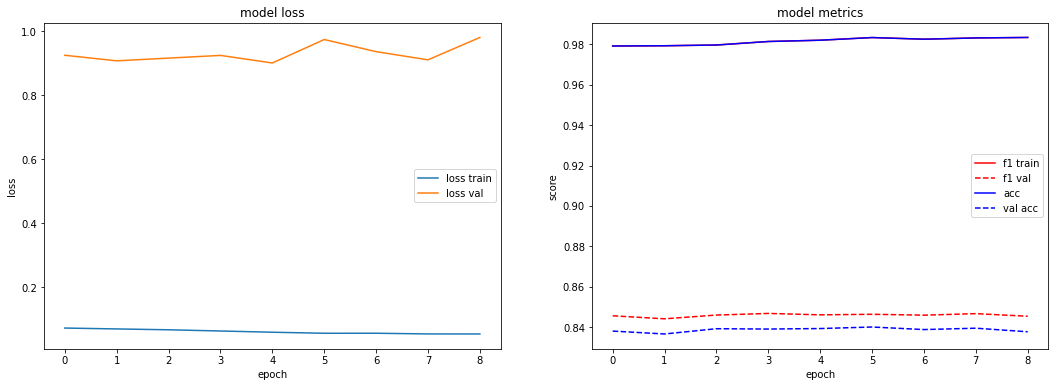

In [ ]:
import matplotlib.pyplot as plt
# plot history
def babysit(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

    # summarize history for loss
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('model loss')
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax1.legend(['loss train', 'loss val'], loc='best')

    # summarize history for loss
    ax2.plot(history.history['f1_score'], "-", c="red")
    ax2.plot(history.history['val_f1_score'], "--", c="red")
    ax2.plot(history.history['accuracy'], "-", c="blue")
    ax2.plot(history.history['val_accuracy'], "--", c="blue")
    ax2.set_title('model metrics')
    ax2.set_ylabel('score')
    ax2.set_xlabel('epoch')
    ax2.legend(['f1 train', 'f1 val', 'acc', 'val acc'], loc='best')

    plt.show()
    
babysit(history)

## Evaluate the model

In [ ]:
labels = df1['soc_abbrev']
labels = {label:i for i, label in enumerate(labels)}
labels_id = [i for i, _ in enumerate(labels)]

In [ ]:
from sklearn.metrics import classification_report
# Evauate the best model
y_pred_enc = model.predict(X_test)
y_pred = np.argmax(y_pred_enc,axis=1) 

print(classification_report(y_test, y_pred, target_names=labels, labels=labels_id))

798/798 [==============================] - 5s 6ms/step
              precision    recall  f1-score   support

        Surg       0.82      0.76      0.79       354
        Card       0.87      0.81      0.84       441
        Cong       0.84      0.64      0.72      1344
         Ear       0.86      0.84      0.85       128
        Skin       0.81      0.73      0.77       205
       Repro       0.87      0.81      0.84       827
       Renal       0.88      0.84      0.86      1249
       Immun       0.32      0.80      0.45       732
        Nerv       0.88      0.84      0.86       214
        Endo       0.77      0.68      0.72       164
       Gastr       0.94      0.89      0.91      2317
        Preg       0.87      0.86      0.86      2100
       Blood       0.97      0.95      0.96      4434
       Hepat       0.69      0.65      0.67       334
        Musc       0.81      0.78      0.79       824
         Eye       0.98      0.95      0.97      2696
       Psych       0.63   

In [ ]:
entities = df_symptom['soc_abbrev']
entity_map = {entity: i for i, entity in enumerate(entities)} 
entity_map

{'blood': 84639,
 'inv': 85080,
 'preg': 82783,
 'musc': 84785,
 'psych': 85021,
 'genrl': 85056,
 'nerv': 84865,
 'infec': 85090,
 'neopl': 85036,
 'gastr': 85048,
 'surg': 85088,
 'eye': 85050,
 'cong': 85055,
 'inj&p': 85008,
 'vasc': 84672,
 'metab': 82918,
 'repro': 85029,
 'endo': 82942,
 'prod': 80463,
 'socci': 85019,
 'skin': 85052,
 'card': 84608,
 'resp': 84786,
 'renal': 84767,
 'hepat': 84759,
 'ear': 84755,
 'immun': 82909}

## Train the Model - Bi-RNN with attention

In [ ]:
from tensorflow.keras import backend as K

def build_model_with_attention():
    # Define the input layer
    input_ = layers.Input(shape=(1,), dtype=tf.string)
    
    # Convert the input to a dense vector
    x = sym_vectorizer(input_)
    
    # Define the embedding layer
    x = layers.Embedding(vocab_size_sym, embedding_size, name="Embedding")(x)
    
    # Apply a Bidirectional LSTM layer
    lstm = layers.Bidirectional(layers.LSTM(recurrent_size, return_sequences=True, 
                                            dropout=dropout_rate, 
                                            recurrent_dropout=dropout_rate))(x)
    
    # Define the attention mechanism
    attention = layers.Dense(1, activation='tanh')(lstm)
    attention = layers.Flatten()(attention)
    attention = layers.Activation('softmax')(attention)
    attention = layers.RepeatVector(recurrent_size*2)(attention)
    attention = Permute([2, 1])(attention)
    
    # Apply the attention mechanism
    x = layers.multiply([lstm, attention])
    x = layers.Lambda(lambda lstm: K.sum(lstm, axis=1))(x)
    
    # Add additional layers
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(16, activation='relu')(x)
    
    # Define the output layer
    output_ = layers.Dense(nb_classes, activation='softmax', dtype=tf.float64)(x)
    
    # Define the model
    model = Model(input_, output_)
    return model

model2 = build_model_with_attention()


In [ ]:
model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 Symptom_vect (TextVectorizatio  (None, 29)          0           ['input_5[0][0]']                
 n)                                                                                               
                                                                                                  
 Embedding (Embedding)          (None, 29, 50)       1138800     ['Symptom_vect[4][0]']           
                                                                                                  
 bidirectional (Bidirectional)  (None, 29, 128)      58880       ['Embedding[0][0]']        

In [ ]:
# Compile the model
f1 = F1Score(num_classes=nb_classes, average="weighted", threshold=None)
model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy", f1])

In [ ]:
# Configure the model and start training
# Stop training with early stopping with patience of 5
callbacks_list = [EarlyStopping(monitor='val_f1_score', mode='max', min_delta=0.000001,
                                patience=5, restore_best_weights=True, verbose=1,
                                )]
history = model2.fit(X_train, y_train_enc,
                    validation_data=(X_val, y_val_enc),
                    epochs=1000, batch_size=batch_size,
                    callbacks=callbacks_list,
                    verbose=1)

Epoch 1/1000
373/373 [==============================] - 93s 229ms/step - loss: 2.5917 - accuracy: 0.2352 - f1_score: 0.1958 - val_loss: 2.1212 - val_accuracy: 0.3944 - val_f1_score: 0.3562
Epoch 2/1000
373/373 [==============================] - 83s 222ms/step - loss: 1.9879 - accuracy: 0.4206 - f1_score: 0.3831 - val_loss: 1.8196 - val_accuracy: 0.4932 - val_f1_score: 0.4473
Epoch 3/1000
373/373 [==============================] - 82s 221ms/step - loss: 1.6548 - accuracy: 0.5203 - f1_score: 0.4820 - val_loss: 1.6327 - val_accuracy: 0.5490 - val_f1_score: 0.5030
Epoch 4/1000
373/373 [==============================] - 85s 227ms/step - loss: 1.4339 - accuracy: 0.5812 - f1_score: 0.5424 - val_loss: 1.5417 - val_accuracy: 0.5873 - val_f1_score: 0.5442
Epoch 5/1000
373/373 [==============================] - 82s 220ms/step - loss: 1.2355 - accuracy: 0.6329 - f1_score: 0.5979 - val_loss: 1.4105 - val_accuracy: 0.6140 - val_f1_score: 0.5845
Epoch 6/1000
373/373 [==============================] -

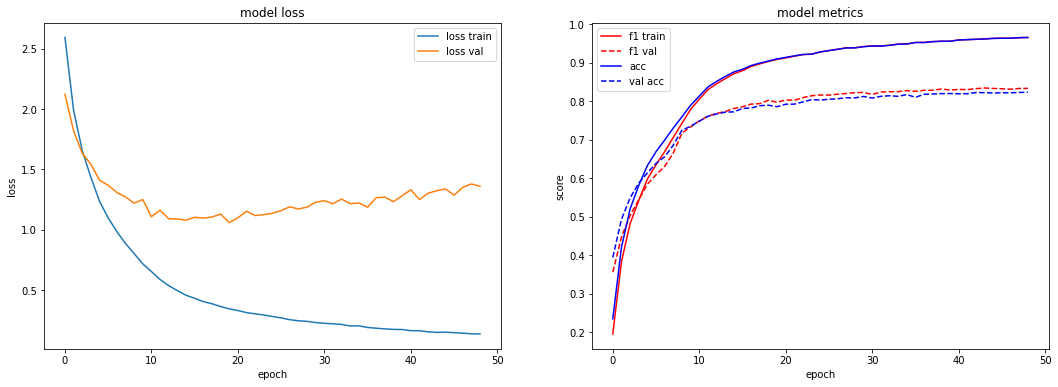

In [ ]:
babysit(history)

In [ ]:
from sklearn.metrics import classification_report
# Evauate the best model
y_pred_enc = model2.predict(X_test)
y_pred = np.argmax(y_pred_enc,axis=1) 

print(classification_report(y_test, y_pred, target_names=labels, labels=labels_id))

798/798 [==============================] - 15s 18ms/step
              precision    recall  f1-score   support

        Surg       0.71      0.76      0.74       354
        Card       0.84      0.78      0.81       441
        Cong       0.82      0.63      0.71      1344
         Ear       0.70      0.80      0.75       128
        Skin       0.78      0.71      0.74       205
       Repro       0.83      0.81      0.82       827
       Renal       0.88      0.84      0.86      1249
       Immun       0.26      0.80      0.39       732
        Nerv       0.78      0.78      0.78       214
        Endo       0.65      0.65      0.65       164
       Gastr       0.93      0.89      0.91      2317
        Preg       0.86      0.85      0.86      2100
       Blood       0.97      0.94      0.95      4434
       Hepat       0.74      0.60      0.66       334
        Musc       0.83      0.78      0.80       824
         Eye       0.98      0.95      0.96      2696
       Psych       0.82 